In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [31]:
df=pd.read_csv("customer_churn.csv")
df.drop(columns="CustomerID",inplace=True)
df

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Male,58,3,73819.57,1,0,0,42115.00,0
1,Female,47,4,198351.81,1,0,0,136770.95,0
2,Male,34,5,46307.11,4,1,0,120984.43,1
3,Male,66,4,229438.12,2,1,1,29942.39,0
4,Male,37,6,106131.86,3,0,0,148274.78,1
...,...,...,...,...,...,...,...,...,...
795,Male,49,8,200088.72,3,1,0,36522.51,0
796,Male,63,6,165666.13,4,1,0,44606.87,0
797,Male,60,9,23071.20,4,0,1,79713.09,0
798,Male,33,6,149080.38,2,1,1,117776.73,0


In [32]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,58,3,73819.57,1,0,0,42115.00,0
1,0,47,4,198351.81,1,0,0,136770.95,0
2,1,34,5,46307.11,4,1,0,120984.43,1
3,1,66,4,229438.12,2,1,1,29942.39,0
4,1,37,6,106131.86,3,0,0,148274.78,1
...,...,...,...,...,...,...,...,...,...
795,1,49,8,200088.72,3,1,0,36522.51,0
796,1,63,6,165666.13,4,1,0,44606.87,0
797,1,60,9,23071.20,4,0,1,79713.09,0
798,1,33,6,149080.38,2,1,1,117776.73,0


In [33]:
X=df[["Gender","Balance"]].values
y=df["Exited"].values

In [34]:
scalar=StandardScaler()
scu=scalar.fit_transform(X)
scu

array([[ 1.03563452, -0.66904365],
       [-0.96559161,  1.05619499],
       [ 1.03563452, -1.05019442],
       ...,
       [ 1.03563452, -1.37209893],
       [ 1.03563452,  0.37360087],
       [ 1.03563452,  0.21172713]], shape=(800, 2))

In [35]:
x_train,x_test,y_train,y_test=train_test_split(scu,y,test_size=0.2,random_state=42)

accuracy score of linear:71.88%


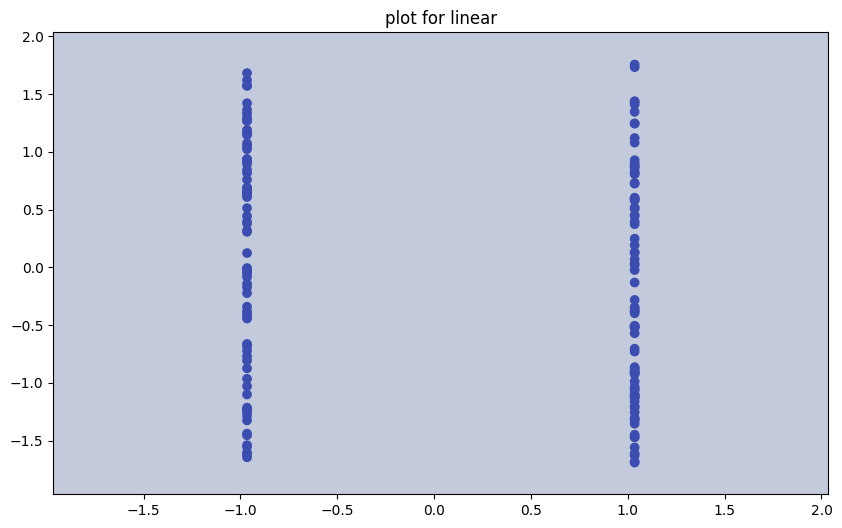

accuracy score of poly:71.88%


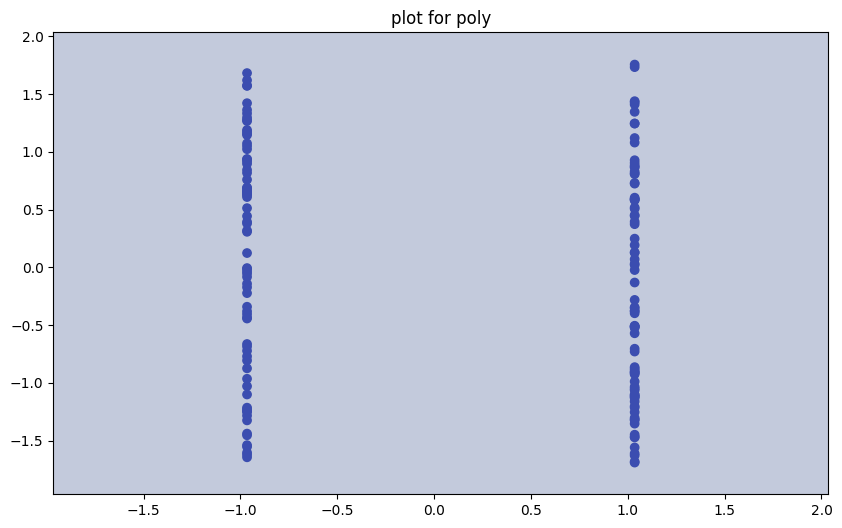

accuracy score of rbf:71.88%


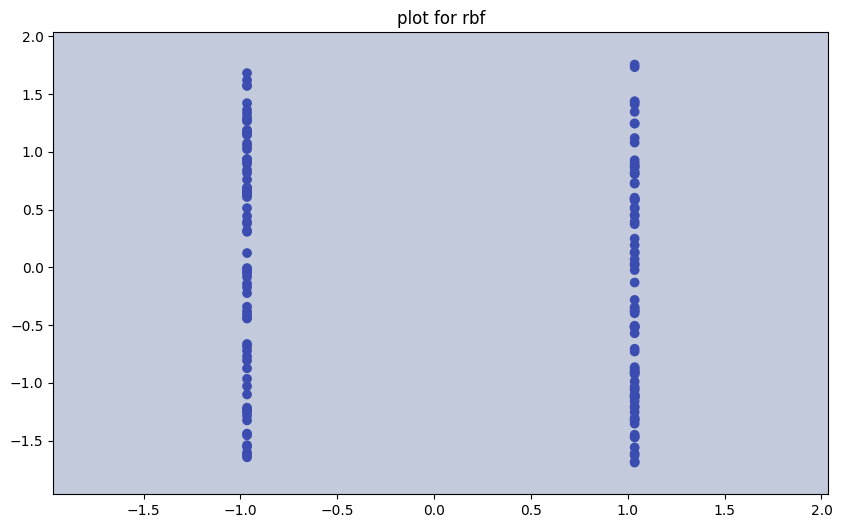

accuracy score of sigmoid:62.50%


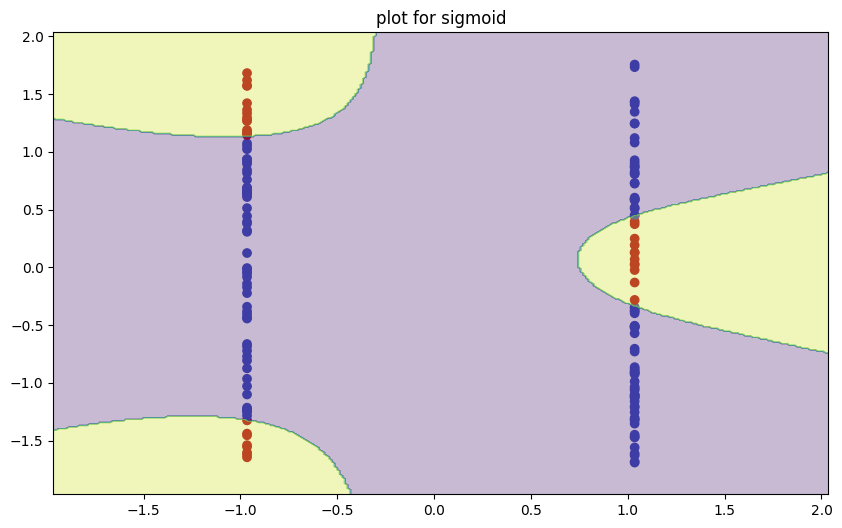

In [36]:
kernal=["linear","poly","rbf","sigmoid"]
for i in kernal:
    svm=SVC(kernel=i,degree=3,gamma="auto")
    svm.fit(x_train,y_train)
    y_pred=svm.predict(x_test)
    y_pred
    acc=accuracy_score(y_test,y_pred)
    print(f"accuracy score of {i}:{acc*100:.2f}%")

    plt.figure(figsize=[10,6])
    plt.scatter(x_test[:, 0],x_test[:, 1],c=y_pred,cmap="coolwarm")
    x_min,x_max=x_test[:, 0].min()-1 ,x_test[:, 0].max()+1
    y_min,y_max=x_test[:, 1].min()-1 ,x_test[:, 1].max()+1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,300),np.linspace(x_min,x_max,300))
    z=svm.predict(np.c_[xx.ravel(),yy.ravel()])
    plt.contourf(xx,yy,z.reshape(xx.shape),alpha=0.3)
    plt.title(f"plot for {i}")
    plt.show()


In [38]:
new=np.array([[32.980285,19912.928365]])
scu=scalar.transform(new)
a=svm.predict(scu)
a

array([1])